<a href="https://colab.research.google.com/github/RJuro/Africalics-PhD-Academy-2018/blob/master/notebooks/NLP_Intro_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Natural Language Processing 

The second part of M2 will be dealing with language data – working our way from simple string manipulation to word- and document-embeddings wit [Word2Vec](https://en.wikipedia.org/wiki/Word2vec)(Mikolov et al. 2013) and [FastText](https://fasttext.cc/). 
While NLP before 2013/2014 would have been very much focused on comutational linguistics, the introduction word-embeddings (or word-vectors) triggered a revolution in this field and let to a retreat of grammar/rule-based approaches.

![alt text](https://rawcdn.githack.com/SDS-AAU/M2-2019/c8b4c787e1ee8e5015c661db6305c9529e988ec6/notebooks/goldberg_nlp_hist.png)
source: Yuval Goldberg: https://youtu.be/e12danHhlic?t=428

This is for instance reflected in the [course design](http://web.stanford.edu/class/cs224n/) at top institutions where NLP courses have been merged with Deep Learning courses and many linguistic approaches have vanished from the curriculum.

The SDS-NLP curriculum will be covering the most central basics in a very broad fashion to provide you with an overview of the different concepts and approaches in this discipline. The goal will be to enable you to integrate text data into unsupervised and supervised ML projects.

We will start with simple string manipulation and preprocessing, then move to (still relevant) old-school tasks such as part-of-speech tagging, and to "simple" nummerical text representation. The curriculum will end with an introduction to language-models & word-embeddings and how we can use them for generating rich document representations in ML pipelins.

Being able to laverage NLP techniques will enable to to synthesize data out of abundand unstructured text. It is a skill/discipline that is not often instructed because of its too "soft" character (for CS people) and therefore organisations - even tech giants - are often not up to date when it comes to using NLP.

Aside from the Datacamp courses there are some great resources on NLP online.

- Bird, S., Klein, E., & Loper, E. (2009). Natural language processing with Python: analyzing text with the natural language toolkit. " O'Reilly Media, Inc.".
https://www.nltk.org/book/

- Silge, J., & Robinson, D. (2017). Text mining with R: A tidy approach. " O'Reilly Media, Inc.". https://www.tidytextmining.com/


- Stanford's NLP online course (by Dan Jurafsky and Chris Manning):
https://www.youtube.com/watch?v=3Dt_yh1mf_U&list=PLQiyVNMpDLKnZYBTUOlSI9mi9wAErFtFm (playlist), 

- Stanford's NLP & Deep Learning course. https://youtu.be/8rXD5-xhemo (first video - total must see because Chris Manning is amazing)


- If you cannot get enough (especially around November when we are in M3):

- Goldberg, Y. (2017). Neural network methods for natural language processing. Synthesis Lectures on Human Language Technologies, 10(1), 1-309. (recent presentation of Yuval at SpaCy IRL: https://youtu.be/e12danHhlic)

- (Advanced) NLP course at ABBYY - the first 5 notebooks are already translated from Russian. (Format similar to SDS)
https://github.com/DanAnastasyev/DeepNLP-Course/blob/master/README.md

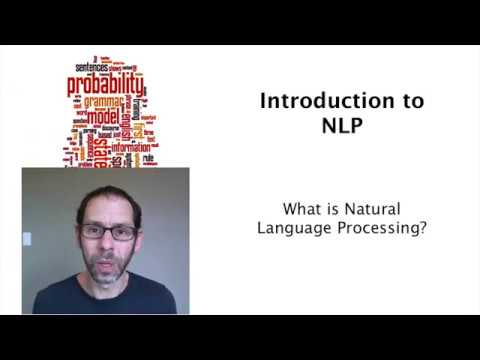

In [1]:
#@title ## Some Youtube Context

from IPython.display import YouTubeVideo
YouTubeVideo('3Dt_yh1mf_U',start=435, frameborder="0", width=800, height=500)

In this Notebook, we will attept to cover the most necessary (imo) basics of Natural Language Processing that will be a working foundation for your future data-mining and ML projects.

We will regard NLP (or more specifically text mining) as a tool for structuring information that is embedded in text-data. Overall, we hope that we can use the computer to read text for us and extract interesting elements from it.

This notebook will guide you through:

- Simple string manipulation
- The concept of tokens and tokenization
- Part of speech tagging (POS)
- Lemmatization and stemming
- Named entity extraction - and linking up in networks
- Bag-of-words model & Tf-Idf
- Unsupervised Learning with NLP: LSA, LDA


Generally, in NLP that aims at ML, we should distinguish between two (ideal) cases:

1. We have few long texts
2. We have many short texts

In most situations where we try to model specific meaning structures it is the 2. case that is most appropriate. However, there are ways to deal with the first case, too.

Along the way, I will try to incorporate some useful tools to get text-data and other tricks...

### R-people:

- [Quanteda](https://quanteda.io/)
- [tidytext](https://www.tidytextmining.com/)
- [text2vec](http://text2vec.org/)

### Simple String Manipulation

We start by taking a piece of text and turning it into something that carries the meaning of the initial text but is less noisy and thus perhaps easier to "understand" by a computer

In [0]:
text = "The Eton-educated, non-binary British Iraqi had always struggled with their identity, until they discovered drag. Yet the 29 year old says the performances come at a high price"

In [3]:
# Split on fullstop
text.lower().split(".")

['the eton-educated, non-binary british iraqi had always struggled with their identity, until they discovered drag',
 ' yet the 29 year old says the performances come at a high price']

In [4]:
# split on empty space
text.split(" ")

['The',
 'Eton-educated,',
 'non-binary',
 'British',
 'Iraqi',
 'had',
 'always',
 'struggled',
 'with',
 'their',
 'identity,',
 'until',
 'they',
 'discovered',
 'drag.',
 'Yet',
 'the',
 '29',
 'year',
 'old',
 'says',
 'the',
 'performances',
 'come',
 'at',
 'a',
 'high',
 'price']

In [5]:
# Find in text (position)
text.find('29')

122

In [6]:
# Simple replacement
text.replace('o', 'O')

'The EtOn-educated, nOn-binary British Iraqi had always struggled with their identity, until they discOvered drag. Yet the 29 year Old says the perfOrmances cOme at a high price'

In [0]:
# very short RegEx
import re

In [8]:
re.findall(r'\d+', text)

['29']

In [9]:
numbers = re.findall(r'\d+', text)

for i in numbers:
    print(text.replace(i, str(int(i) + 1)))

The Eton-educated, non-binary British Iraqi had always struggled with their identity, until they discovered drag. Yet the 30 year old says the performances come at a high price


More on RegEx in the Datacamp courses (there is a whole course on that actually) and [here](https://www.dataquest.io/wp-content/uploads/2019/03/python-regular-expressions-cheat-sheet.pdf)

Overall, in NLP we are trying to represent meaning structure. That means that we want to focus on the most important and "meaning-bearing elements" in text, while reducing noise.
Words such as "and", "have", "the" may have central syntactic functions but are not particularly important from a semantic perspective.


In [0]:
# Defining stopwords

stopwords_en = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 
                'ourselves', 'you', "you're", "you've", "you'll", 
                "you'd", 'your', 'yours', 'yourself', 'yourselves', 
                'he', 'him', 'his', 'himself', 'she', "she's", 'her', 
                'hers', 'herself', 'it', "it's", 'its', 'itself', 
                'they', 'them', 'their', 'theirs', 'themselves', 'what', 
                'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 
                'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 
                'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 
                'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 
                'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 
                'between', 'into', 'through', 'during', 'before', 'after', 'above', 
                'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 
                'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 
                'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 
                'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 
                'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 
                'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 
                'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', 
                "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', 
                "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 
                'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 
                'won', "won't", 'wouldn', "wouldn't"]

In [11]:
# Let's keep only words that are not stopwords
[word for word in text.lower().split() if word not in stopwords_en]

['eton-educated,',
 'non-binary',
 'british',
 'iraqi',
 'always',
 'struggled',
 'identity,',
 'discovered',
 'drag.',
 'yet',
 '29',
 'year',
 'old',
 'says',
 'performances',
 'come',
 'high',
 'price']

In [12]:
# Let's use RegEx one more time to remove leading or trailing punctuation from our words
'drag.,'.strip(r'[" ,.!?:;"]')

'drag'

In [13]:
# Let's combine that and add another condition "No numbers"
[word.strip(r'[" ,.!?:;"]') for word in text.lower().split() if word not in stopwords_en and not word.isdigit()]

['eton-educated',
 'non-binary',
 'british',
 'iraqi',
 'always',
 'struggled',
 'identity',
 'discovered',
 'drag',
 'yet',
 'year',
 'old',
 'says',
 'performances',
 'come',
 'high',
 'price']

Now that you undestand (hopefully) what’s going on on the basic level, let's start using some more sophisticated tools to work with text.

We will import some tokenizers from NLTK

In [14]:
import nltk #this part is needed on colab.
nltk.download('punkt')
nltk.download('stopwords')
#----------------------------------------

# Tokenizing sentences
from nltk.tokenize import sent_tokenize

# Tokenizing words
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
# Let's get our stences.
# Note that the full-stops at the end of each sentence are still there

sentences = sent_tokenize(text)
print(sentences)

['The Eton-educated, non-binary British Iraqi had always struggled with their identity, until they discovered drag.', 'Yet the 29 year old says the performances come at a high price']


In [16]:
# Use word_tokenize to tokenize the third sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[1])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(text))

print(tokenized_sent)
print(unique_tokens)

['Yet', 'the', '29', 'year', 'old', 'says', 'the', 'performances', 'come', 'at', 'a', 'high', 'price']
{'identity', 'old', 'their', 'had', 'come', 'at', 'Eton-educated', 'struggled', 'with', 'performances', 'non-binary', 'high', 'always', 'says', 'drag', 'discovered', 'the', 'British', 'The', 'Yet', 'a', ',', 'year', 'Iraqi', 'they', '29', 'price', 'until', '.'}


In [0]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

In [18]:
[word.lower() for word in word_tokenize(text) if word not in stop_words and word.isalnum()]

['the',
 'british',
 'iraqi',
 'always',
 'struggled',
 'identity',
 'discovered',
 'drag',
 'yet',
 '29',
 'year',
 'old',
 'says',
 'performances',
 'come',
 'high',
 'price']

### Processing many short texts and simple stats

An introduction to NLP would not be the same without Donald's tweets. Let's use these tweets for some more basic NLP and let's try to gather some insights...maybe

![donald_tweets](https://i.cdn.cnn.com/cnn/interactive/2017/politics/trump-tweets/media/trump-tweets-hdr-02.jpg)

Let's try to use some very simple statistics on twitter data:

thanks to [Trump Twitter Archive](http://www.trumptwitterarchive.com)

In [0]:
import pandas as pd
pd.set_option('display.max_colwidth', -1) #to see more text

import numpy as np
import seaborn as sns

import itertools
from collections import Counter

In [0]:
# Tokenizing Tweets made easy!
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [21]:
# download and open some Trump tweets from trump_tweet_data_archive

trump_tweets_df = pd.read_json('https://github.com/bpb27/trump_tweet_data_archive/raw/master/condensed_2018.json.zip')
trump_tweets_df.head()

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
0,2018-12-31 23:53:06,136012,1079888205351145472,NaN,False,33548,Twitter for iPhone,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6
1,2018-12-31 20:02:52,65069,1079830268708556800,25073877.0,False,17456,Twitter for iPhone,"....Senator Schumer, more than a year longer than any other Administration in history. These are people who have been approved by committees and all others, yet Schumer continues to hold them back from serving their Country! Very Unfair!"
2,2018-12-31 20:02:52,76721,1079830267274108928,NaN,False,21030,Twitter for iPhone,Heads of countries are calling wanting to know why Senator Schumer is not approving their otherwise approved Ambassadors!? Likewise in Government lawyers and others are being delayed at a record pace! 360 great and hardworking people are waiting for approval from....
3,2018-12-31 15:39:15,127485,1079763923845419008,NaN,False,29610,Twitter for iPhone,"It’s incredible how Democrats can all use their ridiculous sound bite and say that a Wall doesn’t work. It does, and properly built, almost 100%! They say it’s old technology - but so is the wheel. They now say it is immoral- but it is far more immoral for people to be dying!"
4,2018-12-31 15:37:14,132439,1079763419908243456,NaN,False,30957,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back from vacation now and give us the votes necessary for Border Security, including the Wall. You voted yes in 2006 and 2013. One more yes, but with me in office, I’ll get it built, and Fast!"


In [0]:
# Reset index (not really needed but why not)
trump_tweets_df = trump_tweets_df.set_index(pd.to_datetime(trump_tweets_df.created_at))

In [23]:
# testing the tokenizer
tknzr.tokenize("I am a very #cool tweet by @Roman")

['I', 'am', 'a', 'very', '#cool', 'tweet', 'by', '@Roman']

In [0]:
# Let's identify people Trump likes to mention
trump_tweets_df['mentions'] = trump_tweets_df['text'].map(lambda textline: [tag for tag in tknzr.tokenize(textline) if tag.startswith('@')])

In [0]:
# Only keep tweets where a mention i present
trump_tweets_df = trump_tweets_df[trump_tweets_df['mentions'].map(len) > 0]

In [0]:
# Collect
trump_tags = itertools.chain(*trump_tweets_df['mentions'])

In [27]:
# Count up and show
counted_tags = Counter(trump_tags)
counted_tags.most_common()[:10]

[('@realDonaldTrump', 181),
 ('@WhiteHouse', 100),
 ('@FoxNews', 82),
 ('@foxandfriends', 56),
 ('@FLOTUS', 40),
 ('@Scavino45', 40),
 ('@POTUS', 23),
 ('@IvankaTrump', 17),
 ('@LouDobbs', 16),
 ('@EricTrump', 16)]

#### Most simple sentiment analysis

let's try to categorize our trump tweets by simply matching terms

![alt text](https://miro.medium.com/max/1400/1*T_wr7iiNs9_OR8V19w0qGw.png)

In [0]:
# load a dictionary of positive and negative terms
#!wget https://gist.githubusercontent.com/mkulakowski2/4289437/raw/1bb4d7f9ee82150f339f09b5b1a0e6823d633958/positive-words.txt

In [0]:
#!wget https://gist.githubusercontent.com/mkulakowski2/4289441/raw/dad8b64b307cd6df8068a379079becbb3f91101a/negative-words.txt

In [0]:
# open them by figuring out where the wordlist actually starts, indexing and splitting

#positive_words = open('positive-words.txt','r').read()[1540:].split('\n')

#negative_words = ....

In [0]:
# Create count lists of positive and negative words

#positive_count = trump_tweets_df['text'].map(lambda textline: len([... in tknzr.tokenize(textline) if word in positive_words]))
#negative_count = ...

In [0]:
# make a new column "is_positive" that is true where positive counts > negative counts

In [0]:
# check how you did by looking at some positive ones?

In [0]:
# plot over time positive averages by month

Want to check out the [solution](https://colab.research.google.com/github/SDS-AAU/M2-2019/blob/master/notebooks/NLP_Quick_sentiment_analysis_exercise.ipynb)?

### Long texts and extracting some linguistic features

Now, that we have some experience with short texts, let's try out to work with longer texts. We will be analysing a newspaper article as well as a whole (very long) book. I prepared an example which also covers data-collection as well as easy article scaping [here](https://colab.research.google.com/github/SDS-AAU/M2-2019/blob/master/notebooks/Newspaper_NER_Networks.ipynb).

In this part of the tutorial, I will introduce Spacy, a high-level DeepLearning based NLP library that will help us to do complex stuff with not too much code and without havint do go deep into "old-school-NLP"

<h2 align="center"></h2>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/SpaCy_logo.svg/1200px-SpaCy_logo.svg.png" width="600">


Here a nice [cheat-sheet
](https://github.com/abhat222/Data-Science--Cheat-Sheet/raw/master/Python/spaCy.pdf)
Spacy is today one of the leading solutions for NLP in industry which goes as far as them hosting a [whole conference](https://www.youtube.com/watch?v=hNPwRPg9BrQ&list=PLBmcuObd5An4UC6jvK_-eSl6jCvP1gwXc) with the leading NLP experts worldwide in Berlin last summer

I will introduce you to some functionality but not all. There is an advanced course on SpaCy that can be found on DC.

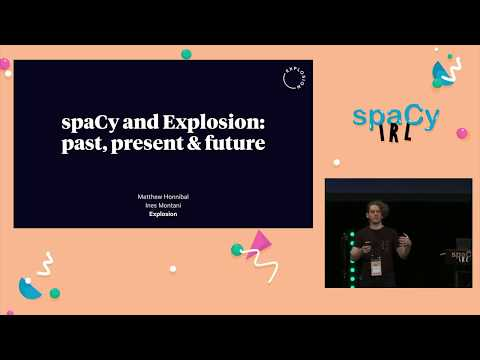

In [28]:
#@title ## Spacy past - present - future

from IPython.display import YouTubeVideo
YouTubeVideo('Jk9y17lvltY',start=435, frameborder="0", width=800, height=500)

In [0]:
# Here is a long article text 
article = """'(CNN) Donald Trump drove Democrats to the first crucial pivot point of their impeachment confrontation on Tuesday with a defiant declaration that his administration would not cooperate with the investigation.\n\nIn a fierce counter-attack after days of failing to control a torrent of damaging disclosures, the Trump White House branded the inquiry an illegal bid to overthrow the 2016 election and blocked testimony from a top diplomat.\n\n"Never before in our history has the House of Representatives -- under the control of either political party -- taken the American people down the dangerous path you seem determined to pursue," White House counsel Pat Cipollone wrote in a letter to House Speaker Nancy Pelos i and her key committee chairs.\n\nThe letter in effect gave notice of all out political warfare as part of the administration\'s strategy to deprive investigators of all the testimony and evidence that they have demanded, in a clear effort to throttle the capacity of the probe into whether Trump abused his power by pressuring Ukraine to investigate a political opponent -- Joe Biden.\n\nPelosi says there is no constitutional requirement supporting Trump\'s demand for a full House vote to initiate impeachment proceedings -- one justification given for the President\'s refusal to cooperate.\n\nBut Trump\'s move left her with grave strategic decisions on what to do next in a confrontation that puts to the test the integrity of America\'s bedrock separation of powers and will determine whether she truly gamed out this duel several steps ahead.\n\nChallenging Trump\'s position in court could bog down the impeachment drive in months of legal challenges. Folding the President\'s obstruction into articles of impeachment in short order could play into his claims that she\'s running a "kangaroo court" and rushing the most consequential function of Congress.\n\nThe American people will now be effectively asked whether a President who accepts few limits on his power can be held in check by a separate branch of government or whether he can avoid such an examination, a decision that will echo through history.\n\nDemocrats are already arguing that Trump\'s position is a de facto admission of guilt based on a legal and political house of sand.\n\n"I guess they haven\'t read the Constitution," said Rep. Tom Malinowski of New Jersey, a Democrat who serves on the House Foreign Affairs Committee.\n\n"If they don\'t defend themselves, against the copious evidence that we already have, then I think it disadvantages them," Malinowski told CNN\'s Erin Burnett.\n\n"This is not the kind of investigation where we are starting with nothing -- we are starting with everything."\n\nTrump\'s call \'crazy\' and \'frightening\'\n\nThe nation\'s most serious political crisis in decades came to a head as more shocking details emerged of Trump\'s attempt to pressure Ukraine.\n\nThe now famous whistleblower wrote a memo that describes a White House official as characterizing the call with Volodymyr Zelensky as "crazy" and "frightening," a source familiar with the whistleblower complaint said.\n\nThe New York Times , which first reported the new details, said in its piece that White House lawyers discussed how to handle the discussion because in the official\'s view the president had clearly committed a criminal act."\n\nIn another break in the drama, CNN reported that Gordon Sondland -- the US ambassador to the EU who Trump prevented from testifying to Congress on Tuesday -- directly called the President in September to find out what was going on amid discussions among his peers over whether US military aid to Ukraine was being withheld.\n\nThe nugget raises the possibility that Sondland\'s text to a colleague that there was no quid pro quo involved was on the orders of the President himself -- a possibility Democrats will surely want to investigate.\n\nHouse Intelligence Committee chairman Adam Schiff suggested Monday that Sondland had texts and emails on a personal device that the State Department was refusing to hand over.\n\nThe new revelations explain why the White House is refusing to cooperate with the impeachment inquiry. It can\'t allow a window into wild, self-serving and possibly even criminal behavior by the President in his dealings with Ukraine that could turn Americans against him.\n\nAs Democrats seek to make a case that the President defies constitutional norms and abuses his power by setting foreign policy for personal political ends, Trump\'s aides must try to slow their momentum and weave a tale of congressional overreach.\n\nThe struggle intensified further after multiple polls showed a majority of Americans now support opening an impeachment inquiry.\n\nBut there is not yet a majority for removing the President from office, underscoring the critical impact of the political battle in Washington now being fully joined by both sides.\n\nTrump dares Pelosi to hold risky vote\n\nTrump\'s letter effectively dares Pelosi, who may want to protect her more moderate members from political damage, to hold a full vote in the House on moving forward with the inquiry.\n\nSuch a vote was held in the last two impeachment sagas concerning Presidents Richard Nixon and Bill Clinton, but there is nothing in the Constitution that mandates such a vote. Trump\'s team says the absence of such a vote means that he has no choice but to withhold cooperation to preserve the scope of his office for future occupants.\n\n"At a constitutional level, that is what we call complete and total nonsense," said CNN legal and national security analyst Susan Hennessey on "The Situation Room."\n\nThe White House maintained that without such a vote, the President and other Executive Branch officials will be denied basic rights available to all Americans.\n\nIt accused Pelosi of denying Trump the right to cross-examine witnesses, to have access to evidence, and for counsel to be present during depositions.\n\n"Put simply, you seek to overturn the results of the 2016 election and deprive the American people of the President they have freely chosen," Cipollone wrote.\n\nHe also argued that the President did nothing wrong in his call with Zelensky, and claimed that Democrats had prejudiced the case with unfair process and had violated the separation of powers.\n\nThe tone of the letter however was far more partisan in tone than legalistic, reflecting that the battle over Trump\'s fate will now come down to a vicious political fight. Mostly, it appeared to defend Trump based on the perceived unfairness of the political process rather than the merits of the Ukraine case.\n\nPelosi vowed in her own letter to House Democrats: "The President will be held accountable. When it comes to impeachment, it is just about the facts and the Constitution," she wrote.\n\n"At the same time as President Trump is obstructing justice, abusing power and diminishing the office of the presidency, we have a responsibility to strengthen the institution in which we serve. This is essential if we are to honor the separation of powers which is the genius of the Constitution."\n\nThe Speaker could decide to call the President\'s bluff by scheduling a full House vote. But there is no guarantee that Trump would cooperate if a full House vote takes place.\n\n"We don\'t want to speculate on what would happen in various hypothetical situations" Cipollone wrote.\n\nA vote would also give Republicans a platform to grandstand and to turn the impeachment process into a circus -- as they have done in previous Democratic oversight hearings -- a factor that might weigh on Pelosi\'s deliberations.\n\nBut there is also an argument that offering Trump a blueprint for an open process, with clearly defined impeachment goals, is not just politically smart but it\'s the right thing to do at a perilous national moment that demands basic standards of fairness.\n\nAs the shockwaves of Trump\'s letter rocked Capitol Hill, Democrats issued a subpoena for testimony and evidence from Sondland, who was stopped from offering a deposition on Capitol Hill by the White House hours before his Tuesday appointment.\n\nStill, as this tumultuous presidency has shown, refusing a congressional subpoena is less risky than ignoring a criminal summons. Democrats could hold recalcitrant witnesses in contempt but that would entail the kind of legal imbroglio they are seeking to avoid, which Trump plans to create.\n\nDemocratic House Intelligence Committee Chairman Adam Schiff hinted that the remedy for the refusal of Sondland and other key officials to testify would rebound against the President.\n\n"The failure to produce this witness, the failure to produce these documents we consider yet additional strong evidence of obstruction of the constitutional functions of Congress," Schiff told reporters.\n\nGirding for the battle ahead, the White House contacted outside lawyers as it seeks impeachment counsel. One of those attorneys is former South Carolina Rep. Trey Gowdy, CNN\'s Pamela Brown reported on Tuesday.'"""

In [0]:
# Let's fire up spacy

import spacy

In [0]:
# and load the small english language model. Large models can be downloaded for many languages.
nlp = spacy.load("en")

In [0]:
# Let's apply the model to the article (as easy as that)
article_nlp = nlp(article)

When you call spaCy it will perform a number of NLP tasks on the text right away.
These tasks are bundled in a pipeline, which can be customised if needed.

![alt text](https://spacy.io/pipeline-7a14d4edd18f3edfee8f34393bff2992.svg)

source: https://spacy.io/usage/processing-pipelines


In [34]:
# Yes spacy recognises entities in the text out of the box (among many other things)
[(ent.text, ent.label_) for ent in article_nlp.ents][:20]

[('CNN', 'ORG'),
 ('Donald Trump', 'PERSON'),
 ('Democrats', 'NORP'),
 ('first', 'ORDINAL'),
 ('Tuesday', 'DATE'),
 ('days', 'DATE'),
 ('Trump White House', 'ORG'),
 ('2016', 'DATE'),
 ('the House of Representatives', 'ORG'),
 ('American', 'NORP'),
 ('White House', 'ORG'),
 ('Pat Cipollone', 'PERSON'),
 ('House', 'ORG'),
 ('Nancy Pelos', 'PERSON'),
 ('Trump', 'ORG'),
 ('Ukraine', 'GPE'),
 ('Joe Biden', 'PERSON'),
 ('Pelosi', 'PERSON'),
 ('Trump', 'ORG'),
 ('House', 'ORG')]

No more Trump. Let's raise the bar with some **Fyodor Dostoevsky**

![alt text](https://i.pinimg.com/564x/bc/eb/9c/bceb9cef99abbed52b940767c9530bbc.jpg)

In [0]:
#let's drop wget-ting and use requests insted (like grown ups)

import requests as rq 

crime_and_punishment_raw = rq.get('http://www.gutenberg.org/files/2554/2554-0.txt').text

In [0]:
# we can devide the book up into sentences

crime_and_punishment_sents = sent_tokenize(crime_and_punishment_raw)

In [0]:
# and then feed every sentence into spacy
crime_and_punishment_sents_nlp = [doc for doc in nlp.pipe(crime_and_punishment_sents)]

In [38]:
#And that's how sentence 200 looks like
crime_and_punishment_sents_nlp[200]

His face, bloated from continual drinking, was of
a yellow, even greenish, tinge, with swollen eyelids out of which keen
reddish eyes gleamed like little chinks.

In [0]:
# Now a bit of a longer chunk of code
# Let's make a list of lists with all person entities
ents_from_sents = []

for sentance in crime_and_punishment_sents_nlp:
    
  sentance_entities = [ent.text for ent in sentance.ents if ent.label_ == 'PERSON']
  sentance_entities = list(set(sentance_entities))

  if len(sentance_entities) > 1:
    ents_from_sents.append(sentance_entities)

In [40]:
# Not perfect but I guess OK...
ents_from_sents[10:20]

[['Amalia Fyodorovna', 'Katerina Ivanovna'],
 ['Semyon Zaharovitch', 'Zaharovitch'],
 ['Thy', 'Katerina Ivanovna'],
 ['Marmeladov', 'Raskolnikov', 'Kozelâ\x80\x99s'],
 ['now?â\x80\x9d\r\n\r\n', 'Raskolnikov'],
 ['SvidrigaÃ¯lov', 'SvidrigaÃ¯lovâ\x80\x99s', 'Marfa Petrovna'],
 ['Marfa Petrovna\r\n', 'Marfa Petrovna'],
 ['Luzhin\r\n', 'Anna'],
 ['the Lesser Neva', 'Vassilyevsky Ostrov'],
 ['Lizaveta', 'Lizaveta Ivanovna', 'Raskolnikov']]

In [0]:
# And here is what we are going to do with it
# Yes - a network
import networkx as nx
import matplotlib.pyplot as plt

In [0]:
# Instantiate graph
G = nx.Graph()

In [0]:
# Create the graph
for i in ents_from_sents:
  G.add_edges_from(list(itertools.combinations(i,2)))

In [0]:
# Calculate degre-centrality and assign it as a node-attribute
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree')

In [0]:
# Getting a "reasonable" lower bound.
perc_filter = np.percentile([v for u,v in degree_centrality.items()], 80)

In [0]:
# Make a subgraph based on nodes with a degree_centrality over the threshold
nodes_selected = [x for x,y in degree_centrality.items() if y >= perc_filter]

G = G.subgraph(nodes_selected)

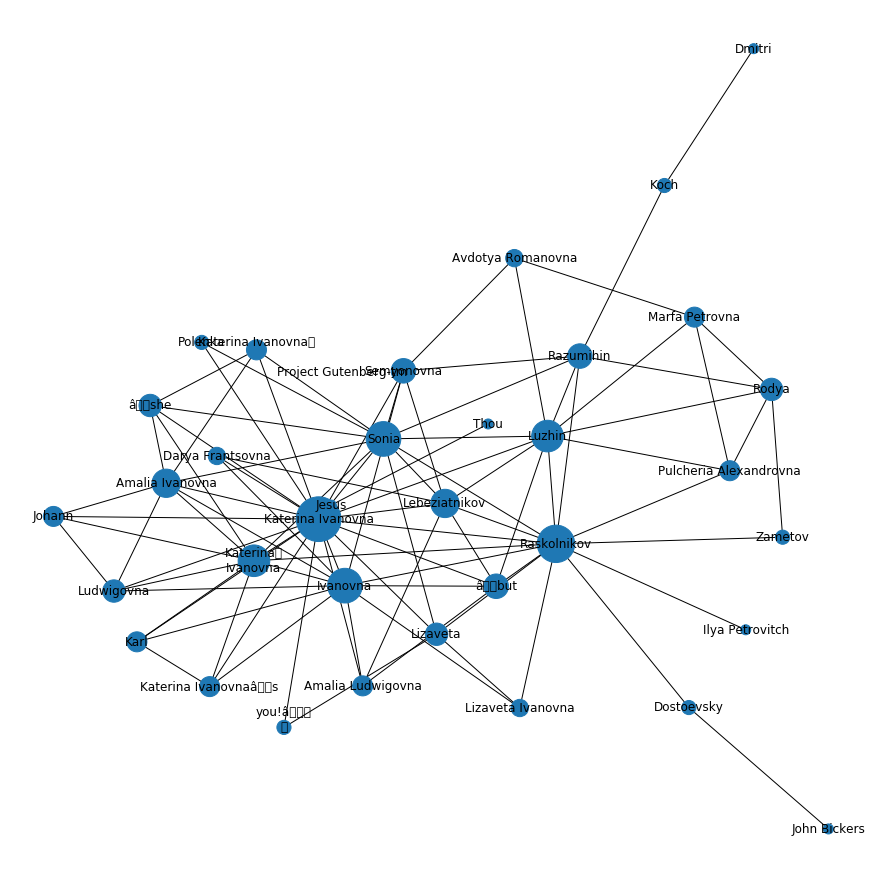

In [48]:
# Not pretty at all
plt.figure(figsize=(12,12)) 
nx.draw_kamada_kawai(G, with_labels = True, node_size=[v * 100 for v in dict(G.degree).values()])

want to know more? Read the book or check out this: https://www.sparknotes.com/lit/crime/characters/

### Bag of words model

In order for a computer to understand text we need to somehow find a useful representation.
If you need to compare different texts e.g. articles, you will probably go for keywords. These keywords may come from a keyword-list with for example 200 different keywords
In that case you could represent each document with a (sparse) vector with 1 for "keyword present" and 0 for "keyword absent"
We can also get a bit more sophoistocated and count the number of times a word from our dictionary occurs.
For a corpus of documents that would give us a document-term matrix
![example](https://i.stack.imgur.com/C1UMs.png)

Let's try creating a bag of words model from our initial example.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    
     'A text about cats.',
     'A text about dogs.',
     'And another text about a dog.',
     'Why always writing about cats and dogs?',
   ]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [50]:
pd.DataFrame(X.A, columns=vectorizer.get_feature_names())

,about,always,and,another,cats,dog,dogs,text,why,writing
0,1,0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,1,1,0,0
2,1,0,1,1,0,1,0,1,0,0
3,1,1,1,0,1,0,1,0,1,1


#### TF-IDF - Term Frequency - Inverse Document Frequency

A token is importan for a document if appears very often
A token becomes less important for comparaison across a corpus if it appears all over the place in the corpus

*Innovation* in a corpus of abstracts talking about innovation is not that important

\begin{equation*}
w_{i,j} = tf_{i,j}*log(\frac{N}{df_i})
\end{equation*}

- $w_{i,j}$ = the TF-IDF score for a term i in a document j
- $tf_{i,j}$ = number of occurence of term i in document j
- $N$ = number of documents in the corpus
- $df_i$ = number of documents with term i


We will use TF-IDF to transform our corpus. However, first we need to fir the TF-IDF model.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [52]:
pd.DataFrame(X.A, columns=vectorizer.get_feature_names())

,about,always,and,another,cats,dog,dogs,text,why,writing
0,0.457453,0.000000,0.000000,0.000000,0.691131,0.000000,0.000000,0.559530,0.000000,0.000000
1,0.457453,0.000000,0.000000,0.000000,0.000000,0.000000,0.691131,0.559530,0.000000,0.000000
2,0.287207,0.000000,0.433919,0.550372,0.000000,0.550372,0.000000,0.351295,0.000000,0.000000
3,0.230239,0.441206,0.347852,0.000000,0.347852,0.000000,0.347852,0.000000,0.441206,0.441206


In [53]:
# One more time trump
# sspaCy also splits sentences
[sentance for sentance in article_nlp.sents][:10]

[',
 (CNN),
 Donald Trump drove Democrats to the first crucial pivot point of their impeachment confrontation on Tuesday with a defiant declaration that his administration would not cooperate with the investigation.
 ,
 In a fierce counter-attack after days of failing to control a torrent of damaging disclosures, the Trump White House branded the inquiry an illegal bid to overthrow the 2016 election and blocked testimony from a top diplomat.
 ,
 "Never before in our history has the House of Representatives -- under the control of either political party -- taken the American people down the dangerous path you seem determined to pursue," White House counsel Pat Cipollone wrote in a letter to House Speaker Nancy Pelos i and her key committee chairs.
 ,
 The letter in effect gave notice of all out political warfare as part of the administration's strategy to deprive investigators of all the testimony and evidence that they have demanded, in a clear effort to throttle the capacity of the pr

In [54]:
# And: it will also annotate them with POS-labels
sentance_2 = [sentance for sentance in article_nlp.sents][2]
[(token.text, token.pos_) for token in sentance_2]

[('Donald', 'PROPN'),
 ('Trump', 'PROPN'),
 ('drove', 'VERB'),
 ('Democrats', 'PROPN'),
 ('to', 'ADP'),
 ('the', 'DET'),
 ('first', 'ADJ'),
 ('crucial', 'ADJ'),
 ('pivot', 'ADJ'),
 ('point', 'NOUN'),
 ('of', 'ADP'),
 ('their', 'DET'),
 ('impeachment', 'NOUN'),
 ('confrontation', 'NOUN'),
 ('on', 'ADP'),
 ('Tuesday', 'PROPN'),
 ('with', 'ADP'),
 ('a', 'DET'),
 ('defiant', 'ADJ'),
 ('declaration', 'NOUN'),
 ('that', 'ADP'),
 ('his', 'DET'),
 ('administration', 'NOUN'),
 ('would', 'VERB'),
 ('not', 'ADV'),
 ('cooperate', 'VERB'),
 ('with', 'ADP'),
 ('the', 'DET'),
 ('investigation', 'NOUN'),
 ('.', 'PUNCT'),
 ('\n\n', 'SPACE')]

In [55]:
# We can use this to extract only tokens that we think bear most of the meaning
[token.text for token in sentance_2 if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop] 

['Donald',
 'Trump',
 'Democrats',
 'crucial',
 'pivot',
 'point',
 'impeachment',
 'confrontation',
 'Tuesday',
 'defiant',
 'declaration',
 'administration',
 'investigation']

In [56]:
# Also, we can create lemmas, thus reducing heterogeneity in the vocabulary without sacrificing much meaning

[tok.lemma_ for tok in nlp("a text about innovations and all kinds things")]

['a', 'text', 'about', 'innovation', 'and', 'all', 'kind', 'thing']

In [57]:
# Isn't that great?

[token.lemma_.lower() for token in sentance_2 if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop] 

['donald',
 'trump',
 'democrats',
 'crucial',
 'pivot',
 'point',
 'impeachment',
 'confrontation',
 'tuesday',
 'defiant',
 'declaration',
 'administration',
 'investigation']

Example with enwspaper networks and NER: https://colab.research.google.com/github/SDS-AAU/M2-2019/blob/master/notebooks/Newspaper_NER_Networks.ipynb

Thus we have created a representation of a text that is probably as "minimal" as possible - Maximising meaning and minimising "moise"

In the last part of this notebook we will try to use such representations to explore the content of text collections

In [0]:
# let's fist install this nice visualizer
!pip install pyLDAvis

In [0]:
# and import it
import pyLDAvis.gensim
%matplotlib inline
pyLDAvis.enable_notebook()

We will be using a dataset from EU Cordis which describes H2020 research projects. No tweets for now.

http://data.europa.eu/euodp/en/data/dataset/cordisH2020projects

In [0]:
# I put the data on our SDS server to make things faster (it takes forever to lode otherwise)

reports = pd.read_csv('http://sds-datacrunch.aau.dk/public/data/cordis-h2020reports.csv', sep=';')

In [0]:
reports.info()

In [0]:
# to speed things up, we will keep the data at 500 projects
# create a random sample

reports = reports.sample(500)
reports = reports[reports['language'] == 'en']

In [0]:
# reindec
reports.index = range(len(reports))

In [0]:
# now, let's combine everything that we learned about preprocessing in a few lines of code

tokens = []

for tweet in nlp.pipe(reports['summary']):
  proj_tok = [token.lemma_.lower() for token in tweet if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop] 
  tokens.append(proj_tok)

In [0]:
# Let's bring the tokens back in

reports['tokens'] = tokens

Another library that you have to know when doing NLP (once you progress to DeepLearning and recent stuff probably not any more but for now) is gensim

https://radimrehurek.com/gensim/

This is the library that handles all kinds of statistical NLP tasks and goes as far as implementing (super efficient) embedding model training (next class)
But: With NLP today being all BERT, ELMO and transformers probably declining in importance. Back in 2013 gensim was a major discovery and breakthrough helper when I was working on my PhD. One more reason to have a look at it.



In [0]:
# Import the dictionary builder
from gensim.corpora.dictionary import Dictionary

In [0]:
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(reports['tokens'])

In [0]:
# filter out low-frequency / high-frequency stuff, also limit the vocabulary to max 1000 words
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [0]:
# construct corpus using this dictionary
corpus = [dictionary.doc2bow(doc) for doc in reports['tokens']]

In [0]:
corpus[100][:10]

### Topic modelling

The corpus is a list of tuples, with word-ids and the number of their occurrence in documents: LDA - https://youtu.be/DWJYZq_fQ2A

We will start with a topic modelling approach that is good for interpretable topics but not too much for further processing


In [0]:
# we'll use the faster multicore version of LDA

from gensim.models import LdaMulticore

In [0]:
# Training the model (makes some mess atm due to version clashes)

lda_model = LdaMulticore(corpus, id2word=dictionary,  num_topics=10, workers = 2, passes=10)

In [0]:
# Check out topics
lda_model.print_topics(-1)

In [0]:
# Let's try to visualize
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)


In [0]:
pyLDAvis.display(lda_display)

In [0]:
# Where does text one belong to?
lda_model[corpus][2]

In [0]:
# And that's how you get the topic-number that's ranked highest

sorted([(2, 0.121567), (9, 0.8610384)], key=lambda x: -x[1])[0][0]

From here, you can assign topics to texts...do some EDA, explore how topics evolve over time etc.

Finally, let's try out LSA (an older topic-moddeling approach similar to NMF) - thus unsupervised ML

In [0]:
# Import the TfidfModel from Gensim
from gensim.models.tfidfmodel import TfidfModel

In [0]:
# Create and fit a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

In [0]:
# Now we can transform the whole corpus
tfidf_corpus = tfidf[corpus]

In [0]:
# Just like before, we import the model
from gensim.models.lsimodel import LsiModel

# And we fir it on the tfidf_corpus pointing to the dictionary as reference and the number of topics.
# In more serious settings one would pick between 300-400
lsi = LsiModel(tfidf_corpus, id2word=dictionary, num_topics=100)

In [0]:
lsi.show_topics(num_topics=10)

In [0]:
# And just as before, we can use the trained model to transform the corpus
lsi_corpus = lsi[tfidf_corpus]

In [0]:
# Load the MatrixSimilarity
from gensim.similarities import MatrixSimilarity

# Create the document-topic-matrix
document_topic_matrix = MatrixSimilarity(lsi_corpus)
document_topic_matrix_ix = document_topic_matrix.index

In [0]:
# this now allows us to perform similarity-queries

sims = document_topic_matrix[lsi_corpus[0]]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print(sims)

We will go deeper into how that works next time
The last bit is a bit of a quick bonus and should be super familiar from M1.

Since we now have a matrix with observations and features - why not trying to apply unsupervisd ML that we know from M1?

In [0]:
# dimensionali lity reduction for plotting
import umap
embeddings = umap.UMAP(n_neighbors=15, metric='cosine').fit_transform(document_topic_matrix_ix)

#------------------------------
# we could use that too

#from sklearn.decomposition import PCA

#reduced = PCA(n_components = 10).fit_transform(document_topic_matrix_ix)

In [0]:
# Nothing new here
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters = 10)
clusterer.fit(document_topic_matrix_ix)

In [0]:
# Plotting things
sns.set_style("darkgrid")

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,12))
g = sns.scatterplot(*embeddings.T,
                    #reduced[:,0],reduced[:,1],
                   hue=clusterer.labels_,
                    palette="Paired",
                   legend='full')

In [0]:
# Let's explore the clusters ... that should actually correlate with topics found by LDA
reports['cluster'] = clusterer.labels_

In [0]:
reports[reports['cluster'] == 2]['teaser']